<a href="https://colab.research.google.com/github/mrhamedani/Machine-learning-projects-ScikitLearn/blob/main/7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
It is very similar to the classification mode, with the difference that the target or label is not known in these datasets

# 1- K-means
**K-Means** is a **clustering algorithm** that partitions data into **\( K \)** groups. It follows these iterative steps:  

1. **Assign data points to the nearest cluster center** based on distance (usually **Euclidean**).  
2. **Update cluster centers** by computing the mean of all points in each cluster.  

The process repeats until convergence (minimal changes) or a set number of iterations. K-Means is widely used in **unsupervised learning**, data analysis, computer vision, and data compression.

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans , DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
km= KMeans(n_clusters=5)
km.fit(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']]) #passing the column name as an argument
df['labels'] = km.labels_ #creating a new column and assigning it the cluster labels

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score_(1-100)'>

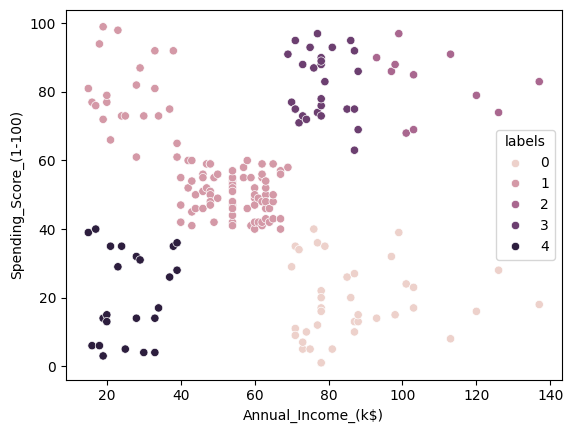

In [14]:
sns.scatterplot(x=df['Annual_Income_(k$)'], y=df['Spending_Score_(1-100)'], hue='labels', data=df)
# Showing being stingy or spendthrift

## 1.1 How many is k?
**- WCSS (Within-Cluster Sum of Squares):**
The graph calculates the sum of squares of the distance between the points and the center of the cluster. This is a descending graph in terms of the number of k, and when the slope decreases, we select the desired k

**- Silhouette**
There is another method that is not mentioned here and is less useful, but it is more accurate


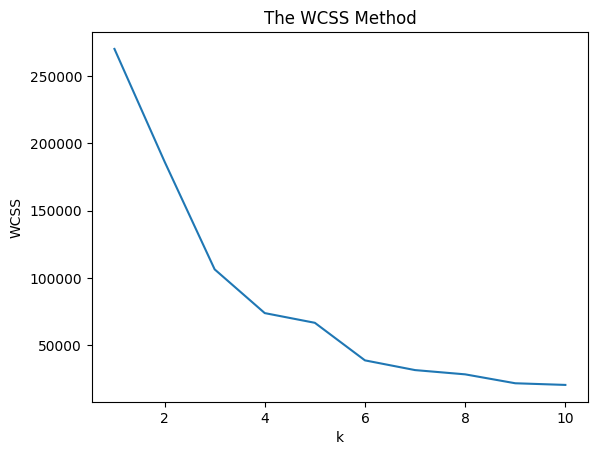

In [17]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The WCSS Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show() # k=5 is best

# 2- DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points without requiring the number of clusters in advance. It has two main parameters:

ε (epsilon): Maximum distance between two points to be considered in the same cluster.
minPts: Minimum number of points required to form a dense region (cluster).


In [25]:
from re import X
center = [[1, 1], [-1, -1], [1, -1]]
x , y = make_blobs(n_samples=750,  centers=center, cluster_std=0.4, random_state=0)
x = StandardScaler().fit_transform(x)

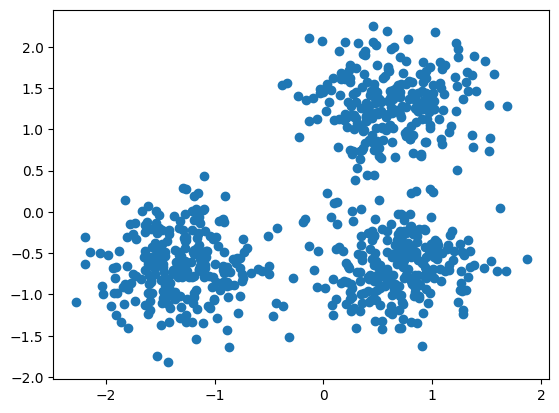

In [26]:
plt.scatter(x[:, 0], x[:, 1]) # x is Coordinates of points   # y is labels
plt.show()


In [27]:
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_ # gives the cluster labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1) # Number of noise points
metrics.silhouette_score(x, labels)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18
